In [23]:
import numpy as np 
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

In [25]:
def fitness(state):
    x = state[0]
    y = state[1]
    
    a = 100*(y - x**2)**2
    b = (1-x)**2
    rosenbrock = a+b
    penalty=max(0, y**2 + x**2 -2)**2
    ans = -rosenbrock - penalty
    return ans

In [26]:
n = 2
num_particles = 1000
num_iterations = 100
inertia_factor = 0.5
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [27]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [28]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [29]:
global_best.state

array([1., 1.])

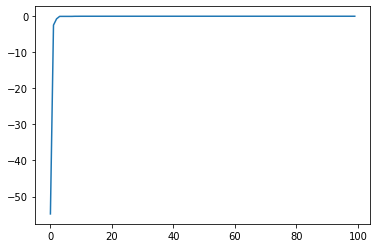

In [30]:
plot(list(range(len(convergence_curve))), convergence_curve)